In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

## 텐서 플로우 2.2.0 을 기반으로 만든 컨볼루션 알고리즘에 대한 설명 

필터로 특징을 뽑아주는 컨볼루션(Convolution) 
Conv2D : 영상 인식에 주로 사용되며, 필터가 탑재

Convolution 연산은 아래에 있는 이미지와 같이 특정 이미지에 3x3 등의 마스크(필터)를 씌워서 모든 셀에 대한 연산의 합을 결과로 내어주는 연산이다.
이때 3x3과 같은 마스크를 씌워서 아래의 이미지와 같은 방식으로 연산을 하여서 특징을 추출한다.

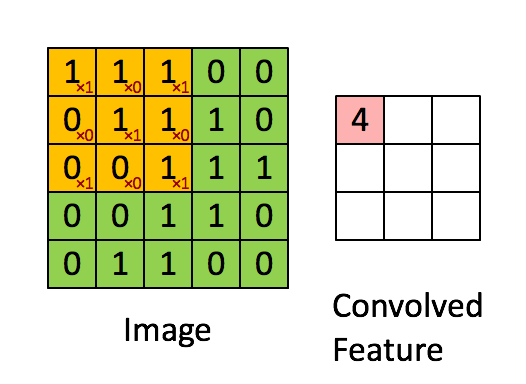

max pooling 은 특정 범위내에 max 값을 내보내어 셀의 크기를 1/n^2 으로 줄여주는 역할을 한다.
avg pooling 은  평균값을 반환한다.
두 경우 모두, 전체 데이터의 사이즈를 줄여서 연산에 대한 컴퓨터 리소스를 줄여주고,
데이터의 크기가 줄어들며 정보의 소실이 발생하는데 이를 통해 overfitting을 막아주는 역할을 한다.
대부분의 경우 convolution 연산을 1~3회 한후 maxpooling을 1개 넣는 식으로 짜여진다.

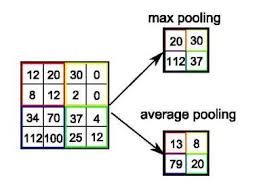

## Conv2D
-  Convolution 필터의 수
-  Convolution 커널의 (행, 열) 
layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape)
- padding : 경계 처리 방법을 정의
  : valid : 유효한 영역만 출력
  : same : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
layers.Conv2D(64, (3, 3), activation='relu',padding="same")

from tensorflow.keras import layers,models

# models.Sequential 상속받는 클래스
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        # #필터수가 3x3 을 32개 사용한다, input_shape: 28x28 , 1 - 흑백, 3 - 컬러 
        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        # 패딩을 입력층과출력층도 크기가 같게 만든다. 이때 필터는 마찬가지로 3x3 64개를 사용한다. 
        self.add(layers.Conv2D(64, (3, 3), activation='relu',padding="same"))
        # 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 이미지를 만듭니다
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        #--------------CNN에서 컨볼루션 레이어나 맥스풀링 레이어를 반복적으로 거치면 주요 특징만 추출된다.
        # DNN으로 연산하기 위해서  1차원 자료로 바꿔줘야 한다.
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        # 10 softmax: 10개중에 가중치가 높은 특정값을 분류 
        self.add(layers.Dense(num_classes, activation='softmax'))
        self.compile(loss="categorical_crossentropy",
                      optimizer='rmsprop',
                      metrics=['accuracy'])
input_shape=28,28,1
kernel_size=3,3


In [3]:
##############################################
# Data : 케라스에서 제공하는 데이터를 불러 왔지만 실제로 적용하기 위해서 아래의 클래스를 편집 하면 됨 
##############################################}
import numpy as np
from tensorflow.keras import datasets,backend
from tensorflow.keras.utils import to_categorical  # to_categorical
class DATA:
    def __init__(self):
        num_classes = 10
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]
        #(샘플 수, 채널 수, 행, 열)로 이루어진 4D 텐서
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            # (샘플 수, 행, 열, 채널 수)
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
        
        # 정규화
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
        #원핫인코딩
        y_train = to_categorical(y_train, num_classes)
        y_test = to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [8]:
%matplotlib inline

In [4]:
##############################################
# Plotting 을 위한 함수 정의 
##############################################
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history
        
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

11493376/11490434 [==============================] - 1s 0us/step
Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
________________________________________________________________

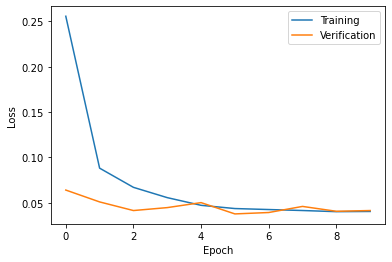

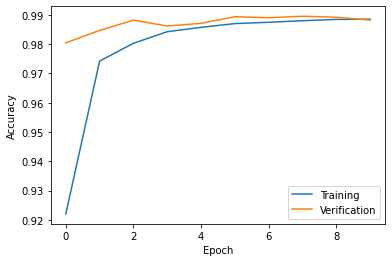

In [5]:
###############################
# 분류 CNN 학습 및 테스트 : CPU에서 테스트 하기 때문에 컴퓨터 사양에 따라서 속도와 성능이 차이가 날 수 있다.
###############################
batch_size = 128
epochs = 10

data = DATA()
model = CNN(data.input_shape, data.num_classes)
model.summary()
history = model.fit(data.x_train, data.y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

score = model.evaluate(data.x_test, data.y_test)
print("------------------------------------------------")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

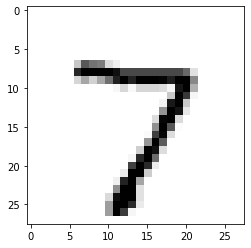

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The Answer is  [7]


In [6]:
# 예측해보기
n = 0
plt.imshow(data.x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(data.x_test[n].reshape((1, 28, 28, 1))))

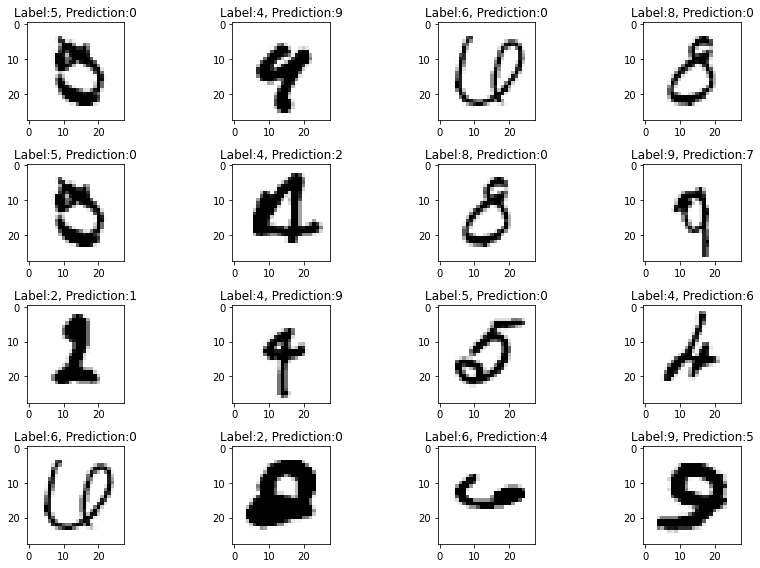

In [7]:

#오답률만 확인 하기 위한 프로그램 

import random
predicted_result = model.predict(data.x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(data.y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(data.x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
plt.tight_layout()
plt.show()